### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [80]:
# Invextigate total the row and column count in the data frame

print(data.shape)

(12684, 26)


In [81]:
# Check for missing values
print(data.isnull().sum())
#car(12576),Bar(107),CoffeeHouse(217),CarryAway(151),RestaurantLessThan20(130),Restaurant20To50(189) are having (null) values   

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [82]:
# investigate the column details of the data frame such as data type, non null count

data.info()
#car has maxinum null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [83]:
#Total null count in data frame is 13370
data.isnull().sum().sum()

13370

In [84]:
#Car is an important column to analyze as having maximum null values. 
data['car'].unique()


array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [85]:
#Let us find all other missing data column details
print("Bar:")
print(data['Bar'].unique() )
print("CoffeeHouse:")
print(data['CoffeeHouse'].unique())
print("CarryAway:")
print(data['CarryAway'].unique())
print("RestaurantLessThan20:")
print(data['RestaurantLessThan20'].unique() )
print("Restaurant20To50:")
print(data['Restaurant20To50'].unique())


Bar:
['never' 'less1' '1~3' 'gt8' nan '4~8']
CoffeeHouse:
['never' 'less1' '4~8' '1~3' 'gt8' nan]
CarryAway:
[nan '4~8' '1~3' 'gt8' 'less1' 'never']
RestaurantLessThan20:
['4~8' '1~3' 'less1' 'gt8' nan 'never']
Restaurant20To50:
['1~3' 'less1' 'never' 'gt8' '4~8' nan]


3. Decide what to do about your missing data -- drop, replace, other...



In [10]:
#Let us work on missing data 
# Firstly, Create a new data frame by making a copy
df = data


Replace null value and fill with appropriate data as may suitable for analysis.
Car is most important column require for analysis.


In [11]:
# Fill the null values in 'car'column as 'NC', indiacating "No Car"

df['car']=df['car'].fillna(value='NC')

In [88]:
# Replace the remaining non null values in 'car'column as 'YC' for recognizing as Car & 'NC' for no car data as appropriate value

df = df.replace({'car' : {'Scooter and motorcycle' : 'YC', 'crossover' : 'YC', 'Mazda5' : 'YC',
                          'do not drive' : 'NC', 'Car that is too old to install Onstar :D' : 'NC'}})

In [89]:
# Let's do a final check for unique values in car column as "NC" and "YC" only

df['car'].unique()

array(['NC', 'YC'], dtype=object)

In [90]:
# Lets recheck 'total' null value count in df

df.isnull().sum().sum()

794

Let us work on other null values, either replace with appropriate value or drop it
Initillly we had total 13370 null values. Now reduced to negilible no of 794. This can be dropped as no significate replacement value needed. This clean up will not have any significnt effect on final analysis.


In [12]:
df = df.dropna()

In [13]:
# Rewchecking the 'total' null value count in df, it should be zero

df.isnull().sum().sum()

0

4. What proportion of the total observations chose to accept the coupon? 



In [14]:
# We shall first calculate the total coupon accepted

coupon_accepted = df['Y'].value_counts()[1]
print("coupon_accepted :")
print(coupon_accepted)


# Now calculate the total coupon offered count

total_coupon_offered = df['Y'].count()
print("total_coupon_offered :")
print(total_coupon_offered)

coupon_accepted :
6877
total_coupon_offered :
12079


In [15]:
# The proportion of coupon acceptance from above values

#proportion_of_coupon_acceptance = round((coupon_accepted/total_coupon_offered)*100,2)

#proportion_of_coupon_acceptance

# Proportion of total observations that chose to accept the coupon
acceptance_rate = df['Y'].mean()
print(acceptance_rate)

0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

Axes(0.125,0.11;0.775x0.77)


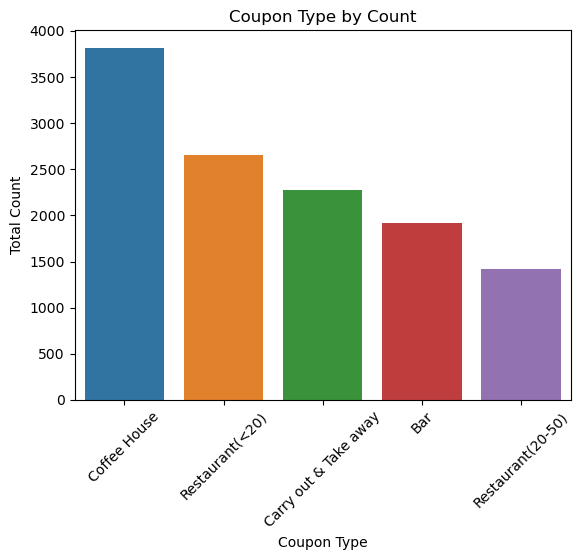

In [16]:
# Draw a bar plot that shows the coupon column with all its unique values with count

bg = sns.barplot(x=df.coupon.value_counts().index, y=df.coupon.value_counts())
bg.tick_params(axis='x', rotation=45)
bg.set(xlabel='Coupon Type', ylabel='Total Count')
bg.set_title('Coupon Type by Count')
print(bg)

Coffee House has maximum coupon offer and Restaurant(20-50) has minimum coupon offer

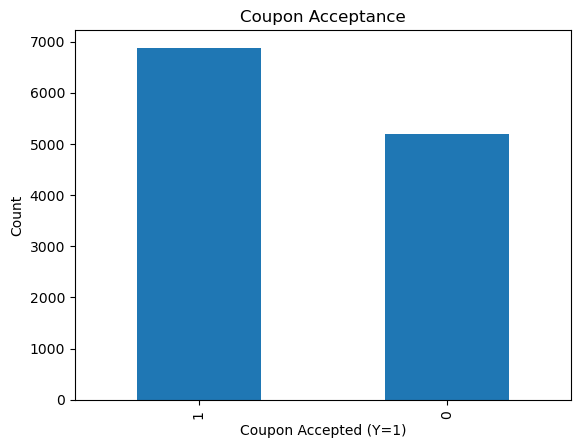

In [17]:
# Visualize the coupon column using a bar plot
df['Y'].value_counts().plot(kind='bar')
plt.xlabel('Coupon Accepted (Y=1)')
plt.ylabel('Count')
plt.title('Coupon Acceptance')
plt.show()

6. Use a histogram to visualize the temperature column.

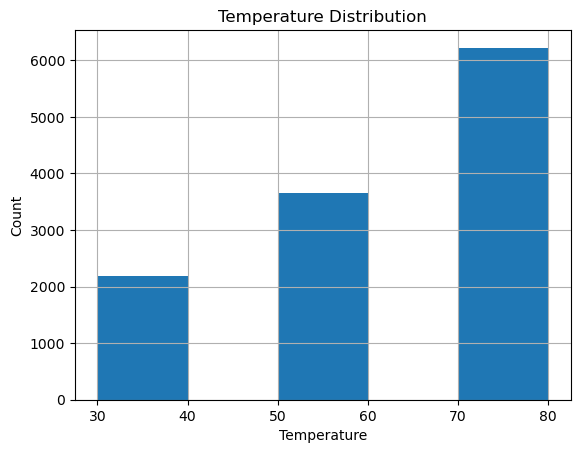

In [18]:
# Visualize the temperature column using a histogram
df['temperature'].hist(bins=5)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature Distribution')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
# Investigating bar coupons
bar_df = df[df['coupon'] == 'Bar']
bar_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


In [20]:
# We shall check the size of the new filtered dataframe for Bar, in terms of rows and columns

bar_df.shape

(1913, 26)

2. What proportion of bar coupons were accepted?


In [22]:
# Proportion of bar coupons accepted
bar_acceptance_rate = bar_df['Y'].mean()
print(bar_acceptance_rate)

0.41191845269210664


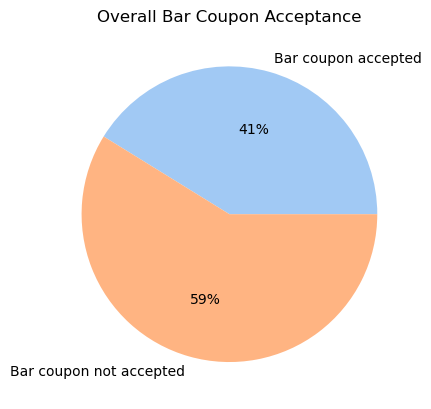

In [141]:
#Visually analyze the Bar dataframe for acceptance of coupon
data = [bar_acceptance_rate, 1 - bar_acceptance_rate]
labels = ['Bar coupon accepted', 'Bar coupon not accepted']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Overall Bar Coupon Acceptance')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [23]:
#Comparision analysis of the acceptance rate of bar

# We shall find all the unique values for the Bar column

bar_df['Bar'].unique()


array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

    Now, only Bar data having 'never', 'less1', '1~3' will be considered to find the acceptance rate of those who went to a bar 3 or fewer times a month. The data category for Bar having 'gt8' and '4~8', went more than 3 times in a month. We shall use these data to analyze the requirement

In [24]:
# Create a list to keep only more frequent entries

more_frequent = ['gt8', '4~8']

# Now, use the list and create a new column with condition based

bar_df['Bar_More_Frequent_Monthly'] = np.where(bar_df['Bar'].isin(['gt8', '4~8']), 1, 0)

# Validate the new column in bar_df is present and the value counts are as expected

bar_df['Bar_More_Frequent_Monthly'].value_counts()

# This column is helpful to find if a person is a more frequent visitor in a month to the bar

C:\Users\Octashop\AppData\Local\Temp\ipykernel_6316\984747459.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['Bar_More_Frequent_Monthly'] = np.where(bar_df['Bar'].isin(['gt8', '4~8']), 1, 0)


Bar_More_Frequent_Monthly
0    1720
1     193
Name: count, dtype: int64

The no of visitor  who went to a bar 3 or fewer times a month is 1720.
The no of visitor who wentto a bar more than 3 times in a month is 193.

In [25]:
#Finally, Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
# Proportion of bar coupons accepted
more_frequent_bar_acceptance_rate = bar_df.query("Bar_More_Frequent_Monthly == 1")['Y'].mean()
print("More frequent bar visitor coupon acceptance rate:")
print(more_frequent_bar_acceptance_rate)

less_frequent_bar_acceptance_rate = bar_df.query("Bar_More_Frequent_Monthly == 0")['Y'].mean()
print("Less frequent bar visitor coupon acceptance rate:")
print(less_frequent_bar_acceptance_rate)


More frequent bar visitor coupon acceptance rate:
0.7616580310880829
Less frequent bar visitor coupon acceptance rate:
0.37267441860465117


In conclusion:
So, More frequent bar visitor has higher coupon acceptance rate than those who visited less than 3 times in a month.

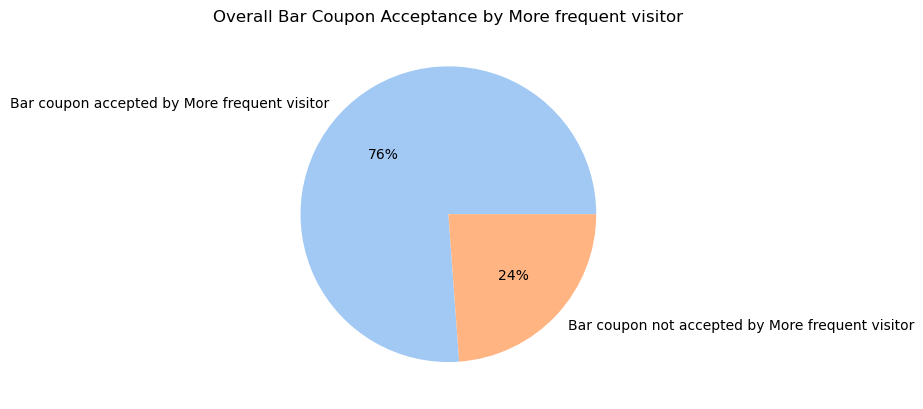

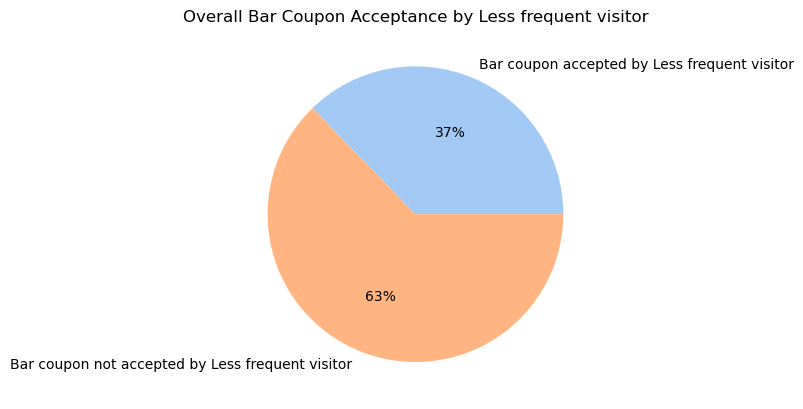

In [26]:
#Visually compare the acceptance of coupon between more frequent and less than 3 times in momnth Bar visitor
data = [more_frequent_bar_acceptance_rate, 1 - more_frequent_bar_acceptance_rate]
labels = ['Bar coupon accepted by More frequent visitor', 'Bar coupon not accepted by More frequent visitor']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Overall Bar Coupon Acceptance by More frequent visitor')
plt.show()


#The acceptance of coupon by less than 3 times in momnth Bar visitor
data = [less_frequent_bar_acceptance_rate, 1 - less_frequent_bar_acceptance_rate]
labels = ['Bar coupon accepted by Less frequent visitor', 'Bar coupon not accepted by Less frequent visitor']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Overall Bar Coupon Acceptance by Less frequent visitor')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [27]:
# We shall find all the unique values for the Age column

bar_df['age'].unique()


array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [38]:
# We shall create a function that checks for both the conditions and return 1 or 0

def age_visit_conditions(x):
    if x['Bar'] in ['1~3', 'gt8', '4~8'] and x['age'] not in ['21', 'below21']:
        return 1
    else:
        return 0
    
# We shall add a new column based on the function above

bar_df['Bar_Visit_Frequent_Age'] = bar_df.apply(age_visit_conditions, axis=1)

C:\Users\Octashop\AppData\Local\Temp\ipykernel_6316\2085844971.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['Bar_Visit_Frequent_Age'] = bar_df.apply(age_visit_conditions, axis=1)


In [39]:
# We shall validate the column and data samples require for comparision

bar_df[['Bar','age','Bar_Visit_Frequent_Age']].sample(15)

,Bar,age,Bar_Visit_Frequent_Age
2659,never,26,0
10102,1~3,36,1
2465,1~3,21,0
10800,gt8,31,1
1936,less1,31,0
5623,4~8,26,1
3846,never,21,0
2831,less1,50plus,0
10580,less1,31,0
3883,never,26,0


In [43]:
# We shall calculate the proportion of bar coupon acceptance from above values for drivers who go to a bar more than once a month and are over the age of 25.

elderly_frequent_bar_acceptance_rate = bar_df.query("Bar_Visit_Frequent_Age == 1")['Y'].mean()
print(elderly_frequent_bar_acceptance_rate)


0.6898263027295285


In [44]:
# Lets calculate the proportion of bar coupon acceptance for less frequent vistors with younger age
young_less_frequent_bar_acceptance_rate = bar_df.query("Bar_Visit_Frequent_Age == 0")['Y'].mean()
print(young_less_frequent_bar_acceptance_rate)

0.33774834437086093


Conclusion:
We found that the 'frequent and elderly visitors' to bar have high coupon acceptance(69%) compared to 'less frequent and young visitors' who have shown less interest (34%)

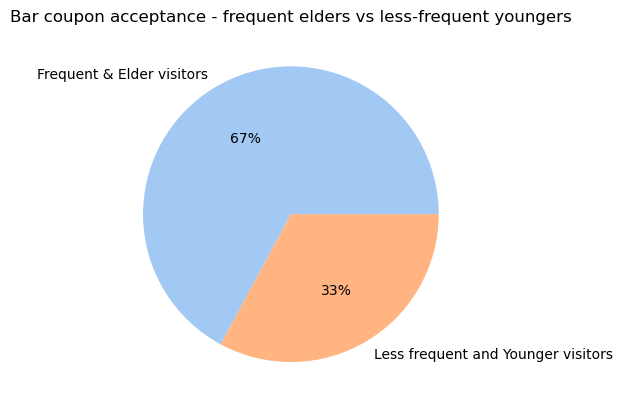

In [46]:
#Visualizing the above conclusion
data = [elderly_frequent_bar_acceptance_rate, young_less_frequent_bar_acceptance_rate]
labels = ['Frequent & Elder visitors', 'Less frequent and Younger visitors']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Bar coupon acceptance - frequent elders vs less-frequent youngers')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [48]:
#Find the unique value for occupation
bar_df['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [49]:
#Find the unique value for occupation
bar_df['passanger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [50]:
# We shall create a function that checks for all 3 
# conditions(drivers who go to bars more than once a month and had passengers that were not a kid and 
# had occupations other than farming, fishing, or forestry) and return 1 or 0

def all_3conditions_freq_pass_job_check(x):
    if x['Bar'] in ['1~3', 'gt8', '4~8'] and x['passanger'] not in ['Kid(s)'] and x['occupation'] not in ['Farming Fishing & Forestry']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

bar_df['Bar_Frequent_Elder_Passenger_Job'] = bar_df.apply(all_3conditions_freq_pass_job_check, axis=1)

C:\Users\Octashop\AppData\Local\Temp\ipykernel_6316\3864814651.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['Bar_Frequent_Elder_Passenger_Job'] = bar_df.apply(all_3conditions_freq_pass_job_check, axis=1)


In [53]:
# We shall validate the new datset for the conditions applied

bar_df[['Bar','passanger','occupation','Bar_Frequent_Elder_Passenger_Job']].sample(15)

,Bar,passanger,occupation,Bar_Frequent_Elder_Passenger_Job
1888,less1,Alone,Student,0
1496,never,Alone,Retired,0
10067,never,Alone,Unemployed,0
10545,never,Alone,Retired,0
2621,never,Alone,Legal,0
3487,never,Alone,Unemployed,0
6933,less1,Kid(s),Business & Financial,0
9832,4~8,Alone,Sales & Related,1
2599,1~3,Alone,Office & Administrative Support,1
767,1~3,Friend(s),Legal,1


In [54]:
# We shall calculate the proportion of bar coupon acceptance for frequent visitor driver with elderly passenger and not farming/fishing job
elder_Pass_frequent_bar_Job_acceptance_rate = bar_df.query("Bar_Frequent_Elder_Passenger_Job == 1")['Y'].mean()
print(elder_Pass_frequent_bar_Job_acceptance_rate)

0.7094339622641509


In [55]:
# Now, We shall calculate the proportion of bar coupon acceptance for less frequent visitor driver or having child passenger or having job as farming/fishing job
child_Pass_less_frequent_bar_Job_acceptance_rate = bar_df.query("Bar_Frequent_Elder_Passenger_Job == 0")['Y'].mean()
print(child_Pass_less_frequent_bar_Job_acceptance_rate)

0.29790310918293567


Conclusion:
Based on above visualization, it was found that Driver visiting frequently to bar and having elder passenger and not having Job  as Fishing/Farming, has higher acceptance rate for coupon ( 71%) than other driver not frequent to bar or having child passenger or having job as Fishing/Farming (30%)


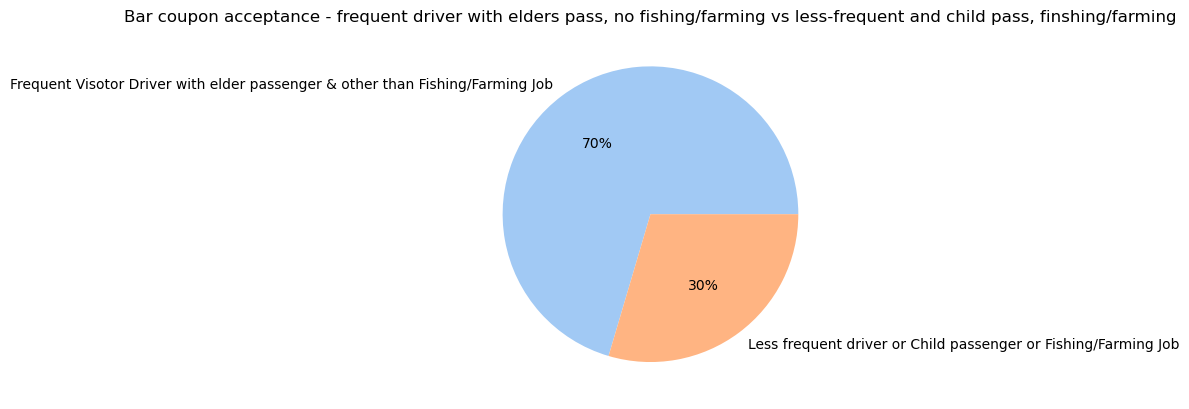

In [57]:
#Visualizing the above conclusion
data = [elder_Pass_frequent_bar_Job_acceptance_rate, child_Pass_less_frequent_bar_Job_acceptance_rate]
labels = ['Frequent Visotor Driver with elder passenger & other than Fishing/Farming Job', 'Less frequent driver or Child passenger or Fishing/Farming Job']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Bar coupon acceptance - frequent driver with elders pass, no fishing/farming vs less-frequent and child pass, finshing/farming')
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [58]:
#Find the all unique value for maritalStatus
bar_df['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [59]:
#Find the all unique value for RestaurantLessThan20
bar_df['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [60]:
#Find the all unique value for income
bar_df['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [61]:
#Condition 1: Compare the acceptance rates between those drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed 
# We shall create a function that checks for all 3 conditions and return 1 or 0

def all_3conditions_freq_pass_notWidow_check(x):
    if x['Bar'] in ['1~3', 'gt8', '4~8'] and x['passanger'] not in ['Kid(s)'] and x['maritalStatus'] not in ['Widowed']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above for condition 1
bar_df['Bar_Frequent_Elder_Passenger_NotWidow'] = bar_df.apply(all_3conditions_freq_pass_notWidow_check, axis=1)


#Condition 2: Compare the acceptance rates between those drivers who go to bars more than once a month and are under the age of 30 
# We shall create a function that checks for both conditions and return 1 or 0

def all_2conditions_freq_under30_check(x):
    if x['Bar'] in ['1~3', 'gt8', '4~8'] and x['age'] in ['below21', '21', '26']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

bar_df['Bar_Frequent_under30'] = bar_df.apply(all_2conditions_freq_under30_check, axis=1)


#Condition 3: Compare the acceptance rates between those drivers who go to cheap restaurants more than 4 times a month and income is less than 50K 
# We shall create a function that checks for both conditions and return 1 or 0

def all_2conditions_4freq_rest_income50k_check(x):
    if x['RestaurantLessThan20'] in ['4~8', 'gt8'] and x['income'] in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

bar_df['Cheap_Rest_4time_under50k'] = bar_df.apply(all_2conditions_4freq_rest_income50k_check, axis=1)




C:\Users\Octashop\AppData\Local\Temp\ipykernel_6316\1304786436.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['Bar_Frequent_Elder_Passenger_NotWidow'] = bar_df.apply(all_3conditions_freq_pass_notWidow_check, axis=1)
C:\Users\Octashop\AppData\Local\Temp\ipykernel_6316\1304786436.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['Bar_Frequent_under30'] = bar_df.apply(all_2conditions_freq_under30_check, axis=1)
C:\Users\Octashop\AppData\Local\Temp\ipykernel_6316\1304786436.py:39: Setting

In [68]:
# We shall validate the dataframe based on applied condition 1 
bar_df[['Bar','passanger','maritalStatus','Bar_Frequent_Elder_Passenger_NotWidow']].sample(10)

,Bar,passanger,maritalStatus,Bar_Frequent_Elder_Passenger_NotWidow
10560,4~8,Alone,Single,1
3017,1~3,Alone,Divorced,1
8257,less1,Kid(s),Married partner,0
1430,less1,Alone,Married partner,0
3176,never,Partner,Married partner,0
4577,never,Partner,Unmarried partner,0
61,never,Alone,Single,0
7734,less1,Friend(s),Unmarried partner,0
1708,never,Kid(s),Married partner,0
6750,1~3,Alone,Single,1


In [69]:
# Condition 1: We shall calculate the proportion of bar coupon acceptance from above values for driver as frequent visitors with elderly passanger and not widowed
elder_Pass_frequent_bar_notWidow_acceptance_rate = bar_df.query("Bar_Frequent_Elder_Passenger_NotWidow == 1")['Y'].mean()
print(elder_Pass_frequent_bar_notWidow_acceptance_rate)


0.7094339622641509


In [65]:
# We shall validate the dataframe based on applied condition 2 
bar_df[['Bar','age','Bar_Frequent_under30']].sample(10)

,Bar,age,Bar_Frequent_under30
10528,never,50plus,0
11378,never,21,0
7746,less1,21,0
8888,4~8,26,1
12371,1~3,26,1
6918,gt8,31,0
8592,1~3,21,1
12573,never,21,0
1069,less1,31,0
2046,less1,26,0


In [72]:
# Condition 2: We shall calculate the proportion of the bar coupon acceptance for high frequent vistors with younger age
bar_frequent_under30_acceptance_rate = bar_df.query("Bar_Frequent_under30 == 1")['Y'].mean()

print(bar_frequent_under30_acceptance_rate)


0.7195121951219512


In [66]:
# We shall validate the dataframe based on applied condition 3
bar_df[['RestaurantLessThan20','income','Cheap_Rest_4time_under50k']].sample(10)


,RestaurantLessThan20,income,Cheap_Rest_4time_under50k
9136,1~3,Less than $12500,0
4523,1~3,$37500 - $49999,0
9978,1~3,$12500 - $24999,0
8932,4~8,Less than $12500,1
195,1~3,$100000 or More,0
10560,4~8,$12500 - $24999,1
2447,1~3,$12500 - $24999,0
6624,1~3,$62500 - $74999,0
9604,less1,$62500 - $74999,0
9501,less1,$100000 or More,0


In [73]:
# Condition 3: We shall calculate the proportion of bar coupon acceptance from above values for driver as for cheap restaurant visitor with low income
Cheap_Rest_4time_under50k_acceptance_rate = bar_df.query("Cheap_Rest_4time_under50k == 1")['Y'].mean()

print(Cheap_Rest_4time_under50k_acceptance_rate)

0.45645645645645644


### Conclusion


Based on above visualization, it was found that Driver visiting frequently to bar and having elder passenger and not widow , has similar acceptance rate for coupon ( ~71%) as driver having high frequent visit and younger age (~72%). However, low income driver frequently visiting cheap restaurant,   having least acceptance(~46%) of coupon.


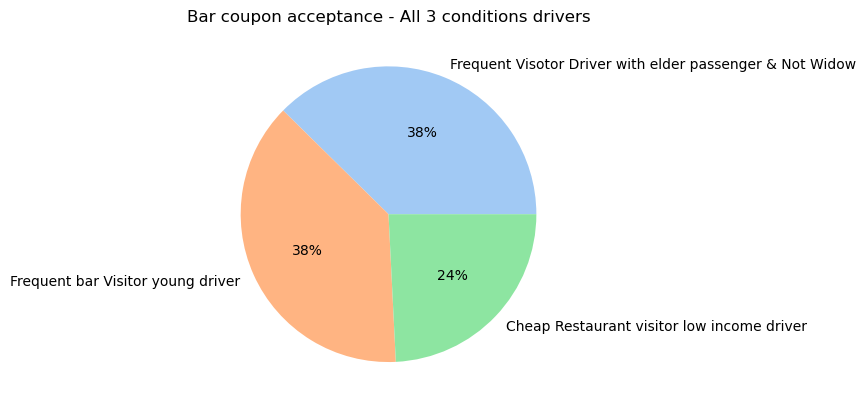

In [75]:
#Visualizing the above conclusion
data = [elder_Pass_frequent_bar_notWidow_acceptance_rate, bar_frequent_under30_acceptance_rate, Cheap_Rest_4time_under50k_acceptance_rate]
labels = ['Frequent Visotor Driver with elder passenger & Not Widow', 'Frequent bar Visitor young driver', 'Cheap Restaurant visitor low income driver']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:3]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Bar coupon acceptance - All 3 conditions drivers')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

a) ~57% of the total observations chose to accept the coupon. This means coupon had been some what effective marketing tools for sales promotion.

b) most of the observation has been taken when temperature was as ~70-80

c) Coffee House has offered highest no of coupon whereas costlier restaurant has least no of coupon offer.

d) Bar coupon has been moderate acceptance as ~41%. 

e) The most frequent Bar visitor driver have more acceptance of the coupons as ~76% as compared to the less frequent bar visitor driver had shown less interest in coupon acceptance (~37%).

f) The 'frequent elderly visitors' to bar have high acceptance(69%) of the coupon  as compared to 'less frequent young visitors' who have showed only less interest (34%).

g) The 'frequent elderly visitor drive with adult passenger and job other than farming/fishing/forestry job' to bar have higher acceptance(~71%) of the coupon as compared to 'less frequent or having child passenger or farming/fishing/forestry job' visitor driver who have showed only less interest (~30%).

h) The 'frequent younger visitors' to bar have accepted the coupons to the most (39%) compared to 'frequent visitors that are elder and widowed' who have slightly less interest (37%) or 'frequent visitors to cheap restaurants with low income' who have even less interest (24%).

h) The Driver visiting frequently to bar and having elder passenger and not widow , has similar acceptance rate for coupon ( ~71%) as driver having high frequent visit and younger age (~72%). However low income driver visiting frequently to cheap restaurant had shown least interest in coupon acceptance(~46%)

In conclusion, Most frequent Bar visitors drivers, are taking advantage of the coupon and acceoting the same more as compare to anyone else.

Evediently, Drivers who are within low income or use cheap restaurants does not much care about the bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Some interesting Investigation

Since Coffee House has offered highest no of coupon whereas costlier restaurant has least no of coupon offer, It would be significant investigattion to visualize thier coupon acceptance.
Let us start with coffee house coupon

In [76]:
#create a new dataframe that is filtered for coffee house coupon only

coffee_df = df.query("coupon == 'Coffee House'")

# visualize and investigate at the top 10 rows for coffee house data frame
coffee_df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
32,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
34,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
37,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
38,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,0
43,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0


In [77]:
#find the number of rows and columns available

coffee_df.shape

(3816, 26)

In [80]:
# Check the acceptance of Coffee house coupon
coffeehouse_acceptance_rate = coffee_df['Y'].mean()
print(coffeehouse_acceptance_rate)

0.49633123689727465


### Conclusion

Coffee House is having ~50% of coupon acceptance. Hence perfornace of coupon acceptance is moderate.

In [82]:
# now, investigate for Restaurant(20-50) coupon acceptance 
#create a new dataframe that is filtered for Restaurant(20-50)  coupon only

restaurant_20_50_df = df.query("coupon == 'Restaurant(20-50)'")

# visualize and investigate at the top 10 rows for Restaurant(20-50) data frame
restaurant_20_50_df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
62,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
80,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0
84,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
102,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
106,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
124,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,1,0,0,1,0
128,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,1,0,0,1,0


In [83]:
#find the number of rows and columns available

restaurant_20_50_df.shape

(1417, 26)

In [84]:
# Check the acceptance of Restaurant(20-50) coupon
restaurant_20_50_acceptance_rate = restaurant_20_50_df['Y'].mean()
print(restaurant_20_50_acceptance_rate)

0.44601270289343686


### Conclusion

Restaurant(20-50) is having ~45% of coupon acceptance. Hence perfornace of coupon acceptance is moderate.

It is evident that Highest No of coupon type have similar performance as Lowest No of coupon type. Hence Offering of coupon is an average marketing tool to increase sales, if other variables are normalized.

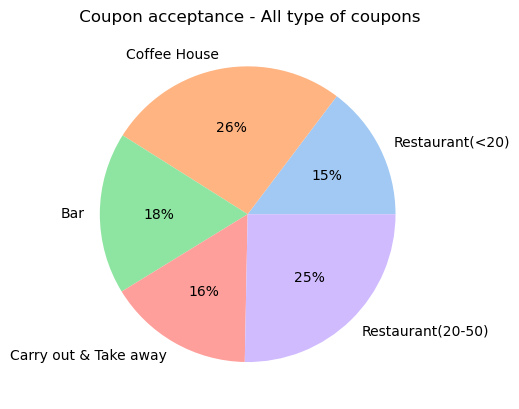

In [92]:
#Visualizing the overall coupon performance
data = df.groupby('coupon')['Y'].mean()

labels = df['coupon'].unique()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:len(labels)]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title(' Coupon acceptance - All type of coupons')
plt.show()

### Final word
In general, Coffee House coupon is overall most accepted by visitor. 